In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn.multioutput import MultiOutputRegressor
import matplotlib.pyplot as plt # 득점모델 변수 중요도
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_csv('./train.csv')
# train_df.drop([ 'X_02', 'X_48', 'X_47', 'X_23', 'X_11', 'X_10', 'X_04'], inplace= True, axis=1)
test_df = pd.read_csv('./test.csv')

In [7]:
train_df['X_11'].describe()

count    39607.000000
mean         0.000366
std          0.014145
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.700000
Name: X_11, dtype: float64

In [3]:
train_x = train_df.filter(regex='X') # Input : X Featrue
train_Y_01 = train_df.filter(regex='Y_01') # Output : Y_01 Feature..
train_Y_02 = train_df.filter(regex='Y_02')
train_Y_03 = train_df.filter(regex='Y_03')
train_Y_04 = train_df.filter(regex='Y_04')
train_Y_05 = train_df.filter(regex='Y_05')
train_Y_06 = train_df.filter(regex='Y_06')
train_Y_07 = train_df.filter(regex='Y_07')
train_Y_08 = train_df.filter(regex='Y_08')
train_Y_09 = train_df.filter(regex='Y_09')
train_Y_10 = train_df.filter(regex='Y_10')
train_Y_11 = train_df.filter(regex='Y_11')
train_Y_12 = train_df.filter(regex='Y_12')
train_Y_13 = train_df.filter(regex='Y_13')
train_Y_14 = train_df.filter(regex='Y_14')
# a = [train_Y_01,train_Y_02,train_Y_03,train_Y_04,train_Y_05,train_Y_06,train_Y_07,train_Y_08,train_Y_09,train_Y_10,train_Y_11,train_Y_12,train_Y_13,train_Y_14]

In [16]:
rf_run = RandomForestRegressor(random_state=0, max_features = 15, max_depth=15, min_samples_leaf=10, min_samples_split=10,n_estimators=200)
LR = MultiOutputRegressor(rf_run).fit(train_x, train_y)




KeyboardInterrupt: 

In [8]:
train_predict = LR.predict(train_x)
print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict, train_y))))

RMSE':0.8824552487600609


In [9]:
test_df = pd.read_csv('./test.csv')
test_df.drop([ 'X_02', 'X_48', 'X_47', 'X_23', 'X_11', 'X_10', 'X_04'], inplace= True, axis=1)

In [10]:
test_x = test_df.filter(regex='X')
test_y = test_df.filter(regex='Y')

In [11]:
test_predict = LR.predict(test_x)

In [12]:
submit = pd.read_csv('./sample_submission.csv')

In [13]:
for idx, col in enumerate(submit.columns):
    if col=='ID':
        continue
    submit[col] = test_predict[:,idx-1]
print('Done.')

Done.


In [15]:
submit.to_csv('./submit_rf3.csv', index=False)

In [10]:
rf_run1 = RandomForestRegressor(random_state=0, max_depth=5, min_samples_leaf=8, min_samples_split=8,n_estimators=200)
rf_run1.fit(train_x, train_Y_01)

C:\Users\User\AppData\Local\Temp\ipykernel_11344\213807434.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_run1.fit(train_x, train_Y_01)


RandomForestRegressor(max_depth=5, min_samples_leaf=8, min_samples_split=8,
                      n_estimators=200, random_state=0)

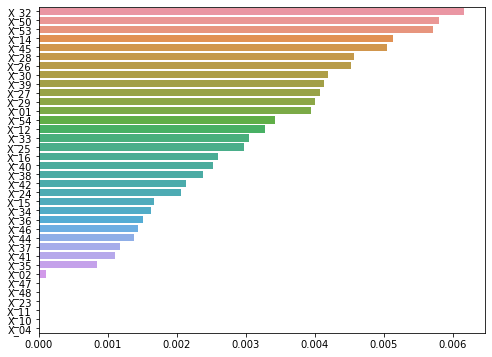

Index(['X_32', 'X_50', 'X_53', 'X_14', 'X_45', 'X_28', 'X_26', 'X_30', 'X_39',
       'X_27', 'X_29', 'X_01', 'X_54', 'X_12', 'X_33', 'X_25', 'X_16', 'X_40',
       'X_38', 'X_42', 'X_24', 'X_15', 'X_34', 'X_36', 'X_46', 'X_44', 'X_37',
       'X_41', 'X_35', 'X_02', 'X_47', 'X_48', 'X_23', 'X_11', 'X_10', 'X_04'],
      dtype='object')

In [11]:
import matplotlib.pyplot as plt # 득점모델 변수 중요도
import seaborn as sns
%matplotlib inline
 
ftr_importances_values = rf_run1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=train_x.columns)
ftr_top1 = ftr_importances.sort_values(ascending=False)[20:]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top1, y=ftr_top1.index)
plt.show()
a = ftr_top1.index[:]
a


In [12]:
rf_run2 = RandomForestRegressor(random_state=0, max_depth=10, min_samples_leaf=8, min_samples_split=8,n_estimators=200)
# for i in a:
#      = rf_run.fit(train_x, i)

rf_run2.fit(train_x, train_Y_02)

C:\Users\User\AppData\Local\Temp\ipykernel_11344\3895261022.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_run2.fit(train_x, train_Y_02)


RandomForestRegressor(max_depth=10, min_samples_leaf=8, min_samples_split=8,
                      n_estimators=200, random_state=0)

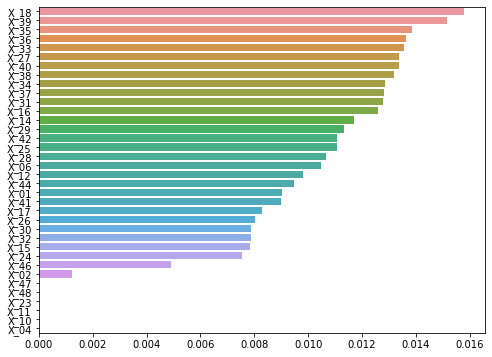

Index(['X_18', 'X_39', 'X_35', 'X_36', 'X_33', 'X_27', 'X_40', 'X_38', 'X_34',
       'X_37', 'X_31', 'X_16', 'X_14', 'X_29', 'X_42', 'X_25', 'X_28', 'X_06',
       'X_12', 'X_44', 'X_01', 'X_41', 'X_17', 'X_26', 'X_30', 'X_32', 'X_15',
       'X_24', 'X_46', 'X_02', 'X_47', 'X_48', 'X_23', 'X_11', 'X_10', 'X_04'],
      dtype='object')

In [13]:
ftr_importances_values = rf_run2.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=train_x.columns)
ftr_top2 = ftr_importances.sort_values(ascending=False)[20:]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top2, y=ftr_top2.index)
plt.show()
b = ftr_top2.index
b

In [14]:
rf_run3 = RandomForestRegressor(random_state=0, max_depth=10, min_samples_leaf=8, min_samples_split=8,n_estimators=200)
rf_run3.fit(train_x, train_Y_03)

C:\Users\User\AppData\Local\Temp\ipykernel_11344\1461572483.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_run3.fit(train_x, train_Y_03)


RandomForestRegressor(max_depth=10, min_samples_leaf=8, min_samples_split=8,
                      n_estimators=200, random_state=0)

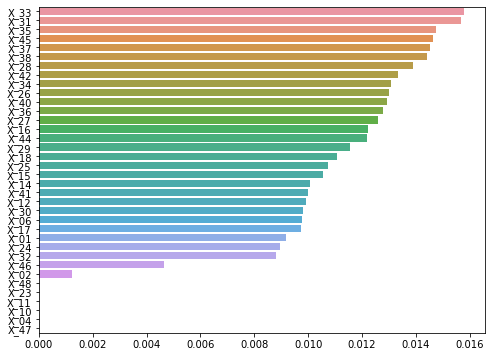

In [15]:
ftr_importances_values = rf_run3.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=train_x.columns)
ftr_top3 = ftr_importances.sort_values(ascending=False)[20:]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top3, y=ftr_top3.index)
plt.show()
c = ftr_top3.index

In [16]:
rf_run4 = RandomForestRegressor(random_state=0, max_depth=10, min_samples_leaf=8, min_samples_split=8,n_estimators=200)
rf_run4.fit(train_x, train_Y_04)

C:\Users\User\AppData\Local\Temp\ipykernel_11344\1609201321.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_run4.fit(train_x, train_Y_04)


RandomForestRegressor(max_depth=10, min_samples_leaf=8, min_samples_split=8,
                      n_estimators=200, random_state=0)

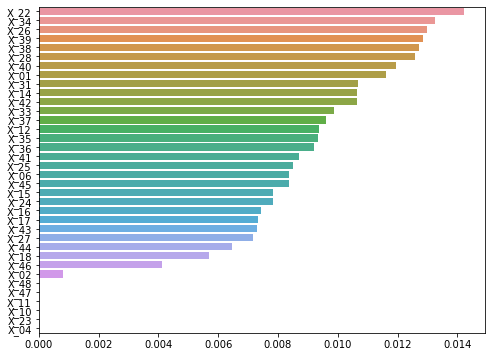

In [17]:
ftr_importances_values = rf_run4.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=train_x.columns)
ftr_top4 = ftr_importances.sort_values(ascending=False)[20:]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top4, y=ftr_top4.index)
plt.show()
d = ftr_top4.index

In [18]:
rf_run5 = RandomForestRegressor(random_state=0, max_depth=10, min_samples_leaf=8, min_samples_split=8,n_estimators=200)
rf_run5.fit(train_x, train_Y_05)

C:\Users\User\AppData\Local\Temp\ipykernel_11344\2049160899.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_run5.fit(train_x, train_Y_05)


RandomForestRegressor(max_depth=10, min_samples_leaf=8, min_samples_split=8,
                      n_estimators=200, random_state=0)

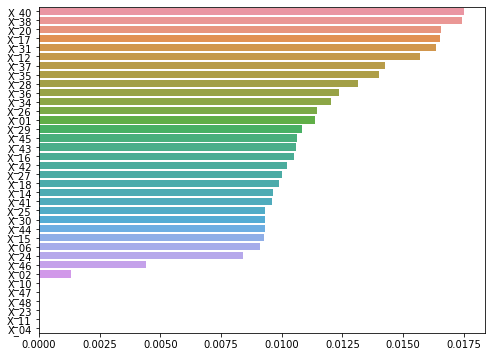

Index(['X_40', 'X_38', 'X_20', 'X_17', 'X_31', 'X_12', 'X_37', 'X_35', 'X_28',
       'X_36', 'X_34', 'X_26', 'X_01', 'X_29', 'X_45', 'X_43', 'X_16', 'X_42',
       'X_27', 'X_18', 'X_14', 'X_41', 'X_25', 'X_30', 'X_44', 'X_15', 'X_06',
       'X_24', 'X_46', 'X_02', 'X_10', 'X_47', 'X_48', 'X_23', 'X_11', 'X_04'],
      dtype='object')

In [19]:
ftr_importances_values = rf_run5.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=train_x.columns)
ftr_top5 = ftr_importances.sort_values(ascending=False)[20:]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top5, y=ftr_top5.index)
plt.show()
e = ftr_top5.index
e

In [20]:
rf_run6 = RandomForestRegressor(random_state=0, max_depth=10, min_samples_leaf=8, min_samples_split=8,n_estimators=200)
rf_run6.fit(train_x, train_Y_06)

C:\Users\User\AppData\Local\Temp\ipykernel_11344\3120298977.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_run6.fit(train_x, train_Y_06)


RandomForestRegressor(max_depth=10, min_samples_leaf=8, min_samples_split=8,
                      n_estimators=200, random_state=0)

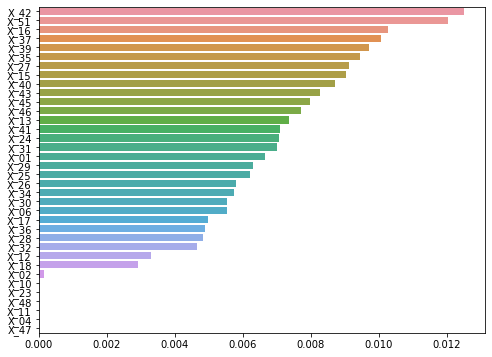

Index(['X_42', 'X_51', 'X_16', 'X_37', 'X_39', 'X_35', 'X_27', 'X_15', 'X_40',
       'X_43', 'X_45', 'X_46', 'X_13', 'X_41', 'X_24', 'X_31', 'X_01', 'X_29',
       'X_25', 'X_26', 'X_34', 'X_30', 'X_06', 'X_17', 'X_36', 'X_28', 'X_32',
       'X_12', 'X_18', 'X_02', 'X_10', 'X_23', 'X_48', 'X_11', 'X_04', 'X_47'],
      dtype='object')

In [21]:
ftr_importances_values = rf_run6.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=train_x.columns)
ftr_top6 = ftr_importances.sort_values(ascending=False)[20:]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top6, y=ftr_top6.index)
plt.show()
f = ftr_top6.index
f

In [22]:
rf_run7 = RandomForestRegressor(random_state=0, max_depth=10, min_samples_leaf=8, min_samples_split=8,n_estimators=200)
rf_run7.fit(train_x, train_Y_07)

C:\Users\User\AppData\Local\Temp\ipykernel_11344\112564368.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_run7.fit(train_x, train_Y_07)


RandomForestRegressor(max_depth=10, min_samples_leaf=8, min_samples_split=8,
                      n_estimators=200, random_state=0)

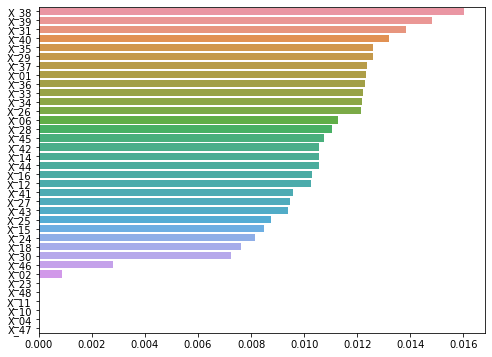

In [23]:
ftr_importances_values = rf_run7.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=train_x.columns)
ftr_top7 = ftr_importances.sort_values(ascending=False)[20:]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top7, y=ftr_top7.index)
plt.show()
g = ftr_top7.index

In [24]:
rf_run8 = RandomForestRegressor(random_state=0, max_depth=10, min_samples_leaf=8, min_samples_split=8,n_estimators=200)
rf_run8.fit(train_x, train_Y_08)

C:\Users\User\AppData\Local\Temp\ipykernel_11344\3933170852.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_run8.fit(train_x, train_Y_08)


RandomForestRegressor(max_depth=10, min_samples_leaf=8, min_samples_split=8,
                      n_estimators=200, random_state=0)

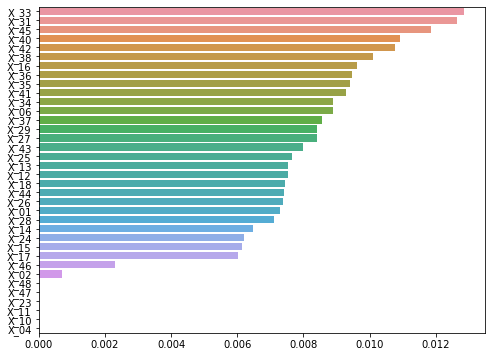

In [25]:
ftr_importances_values = rf_run8.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=train_x.columns)
ftr_top8 = ftr_importances.sort_values(ascending=False)[20:]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top8, y=ftr_top8.index)
plt.show()
h = ftr_top8.index

In [26]:
rf_run9 = RandomForestRegressor(random_state=0, max_depth=10, min_samples_leaf=8, min_samples_split=8,n_estimators=200)
rf_run9.fit(train_x, train_Y_09)

C:\Users\User\AppData\Local\Temp\ipykernel_11344\3139316630.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_run9.fit(train_x, train_Y_09)


RandomForestRegressor(max_depth=10, min_samples_leaf=8, min_samples_split=8,
                      n_estimators=200, random_state=0)

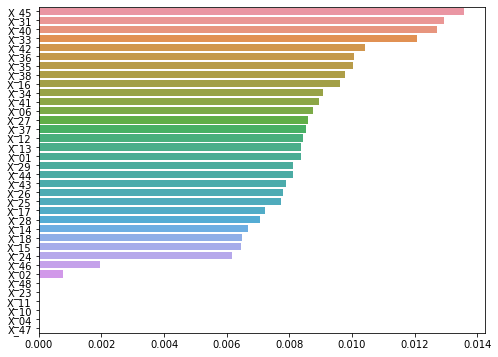

Index(['X_45', 'X_31', 'X_40', 'X_33', 'X_42', 'X_36', 'X_35', 'X_38', 'X_16',
       'X_34', 'X_41', 'X_06', 'X_27', 'X_37', 'X_12', 'X_13', 'X_01', 'X_29',
       'X_44', 'X_43', 'X_26', 'X_25', 'X_17', 'X_28', 'X_14', 'X_18', 'X_15',
       'X_24', 'X_46', 'X_02', 'X_48', 'X_23', 'X_11', 'X_10', 'X_04', 'X_47'],
      dtype='object')

In [27]:
ftr_importances_values = rf_run9.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=train_x.columns)
ftr_top9 = ftr_importances.sort_values(ascending=False)[20:]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top9, y=ftr_top9.index)
plt.show()
i = ftr_top9.index
i

In [28]:
rf_run10 = RandomForestRegressor(random_state=0, max_depth=10, min_samples_leaf=8, min_samples_split=8,n_estimators=200)
rf_run10.fit(train_x, train_Y_10)

C:\Users\User\AppData\Local\Temp\ipykernel_11344\3880776522.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_run10.fit(train_x, train_Y_10)


RandomForestRegressor(max_depth=10, min_samples_leaf=8, min_samples_split=8,
                      n_estimators=200, random_state=0)

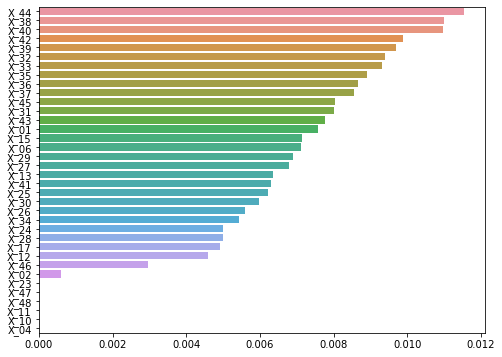

In [29]:
ftr_importances_values = rf_run10.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=train_x.columns)
ftr_top10 = ftr_importances.sort_values(ascending=False)[20:]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top10, y=ftr_top10.index)
plt.show()
j = ftr_top10.index

In [30]:
rf_run11 = RandomForestRegressor(random_state=0, max_depth=10, min_samples_leaf=8, min_samples_split=8,n_estimators=200)
rf_run11.fit(train_x, train_Y_11)

C:\Users\User\AppData\Local\Temp\ipykernel_11344\2163131099.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_run11.fit(train_x, train_Y_11)


RandomForestRegressor(max_depth=10, min_samples_leaf=8, min_samples_split=8,
                      n_estimators=200, random_state=0)

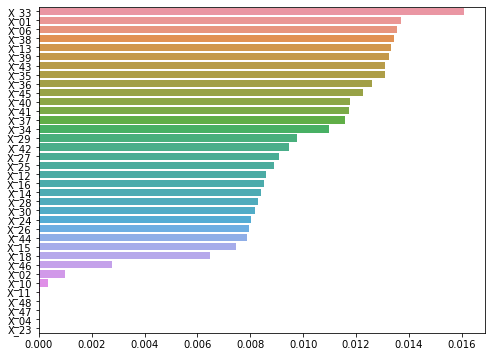

In [31]:
ftr_importances_values = rf_run11.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=train_x.columns)
ftr_top11 = ftr_importances.sort_values(ascending=False)[20:]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top11, y=ftr_top11.index)
plt.show()
k = y=ftr_top11.index

In [32]:
rf_run12 = RandomForestRegressor(random_state=0, max_depth=10, min_samples_leaf=8, min_samples_split=8,n_estimators=200)
rf_run12.fit(train_x, train_Y_12)

C:\Users\User\AppData\Local\Temp\ipykernel_11344\1810558918.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_run12.fit(train_x, train_Y_12)


RandomForestRegressor(max_depth=10, min_samples_leaf=8, min_samples_split=8,
                      n_estimators=200, random_state=0)

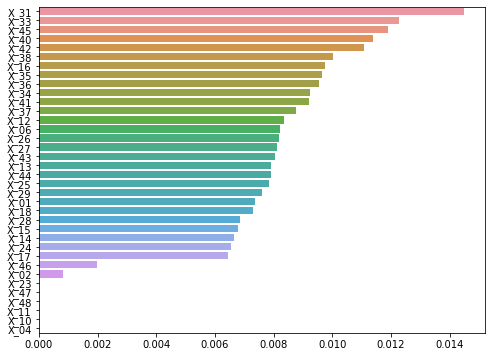

In [33]:
ftr_importances_values = rf_run12.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=train_x.columns)
ftr_top12 = ftr_importances.sort_values(ascending=False)[20:]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top12, y=ftr_top12.index)
plt.show()
l = ftr_top12.index

In [34]:
rf_run13 = RandomForestRegressor(random_state=0, max_depth=10, min_samples_leaf=8, min_samples_split=8,n_estimators=200)
rf_run13.fit(train_x, train_Y_13)

C:\Users\User\AppData\Local\Temp\ipykernel_11344\1390979649.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_run13.fit(train_x, train_Y_13)


RandomForestRegressor(max_depth=10, min_samples_leaf=8, min_samples_split=8,
                      n_estimators=200, random_state=0)

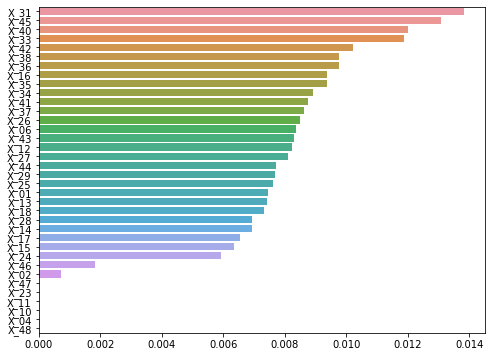

In [35]:
ftr_importances_values = rf_run13.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=train_x.columns)
ftr_top13 = ftr_importances.sort_values(ascending=False)[20:]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top13, y=ftr_top13.index)
plt.show()
m = ftr_top13.index

In [36]:
rf_run14 = RandomForestRegressor(random_state=0, max_depth=10, min_samples_leaf=8, min_samples_split=8,n_estimators=200)
rf_run14.fit(train_x, train_Y_14)

C:\Users\User\AppData\Local\Temp\ipykernel_11344\710648791.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_run14.fit(train_x, train_Y_14)


RandomForestRegressor(max_depth=10, min_samples_leaf=8, min_samples_split=8,
                      n_estimators=200, random_state=0)

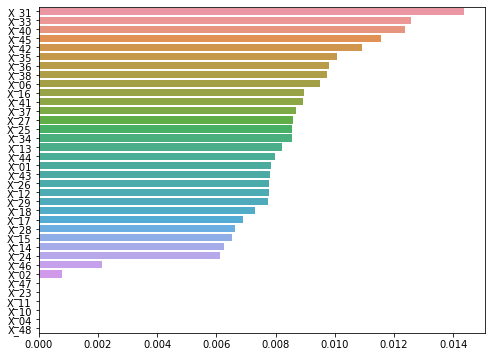

Index(['X_31', 'X_33', 'X_40', 'X_45', 'X_42', 'X_35', 'X_36', 'X_38', 'X_06',
       'X_16', 'X_41', 'X_37', 'X_27', 'X_25', 'X_34', 'X_13', 'X_44', 'X_01',
       'X_43', 'X_26', 'X_12', 'X_29', 'X_18', 'X_17', 'X_28', 'X_15', 'X_14',
       'X_24', 'X_46', 'X_02', 'X_47', 'X_23', 'X_11', 'X_10', 'X_04', 'X_48'],
      dtype='object')

In [37]:
ftr_importances_values = rf_run14.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=train_x.columns)
ftr_top14 = ftr_importances.sort_values(ascending=False)[20:]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top14, y=ftr_top14.index)
plt.show()
n = ftr_top14.index
n

In [152]:
intersection_list = list(set(a) & set(b) & set(c) & set(d) & set(e) & set(f) & set(g) &set(h) & set(i) & set(j) & set(k) & set(l) & set(m) &set(n))

In [153]:
print(intersection_list)

['X_23', 'X_36', 'X_02', 'X_04', 'X_11', 'X_37', 'X_10', 'X_25', 'X_41', 'X_24', 'X_48', 'X_35', 'X_34', 'X_47']


In [160]:
train_df = pd.read_csv('./train.csv')


train_df.drop(['X_23', 'X_36', 'X_02', 'X_04', 'X_11', 'X_37', 'X_10', 'X_25', 'X_41', 'X_24', 'X_48', 'X_35', 'X_34', 'X_47'], inplace = True, axis= 1)
    
    

In [161]:
train_df

,ID,X_01,X_03,X_05,X_06,X_07,X_08,X_09,X_12,X_13,...,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,TRAIN_00001,70.544,67.47,101.892,74.983,29.45,62.38,245.71,4.34,0.18,...,29.632,16.083,4.276,-25.381,-25.529,-22.769,23.792,-25.470,-25.409,-25.304
1,TRAIN_00002,69.524,65.17,101.944,72.943,28.73,61.23,233.61,4.38,0.18,...,33.179,16.736,3.229,-26.619,-26.523,-22.574,24.691,-26.253,-26.497,-26.438
2,TRAIN_00003,72.583,64.07,103.153,72.943,28.81,105.77,272.20,4.36,0.15,...,31.801,17.080,2.839,-26.238,-26.216,-22.169,24.649,-26.285,-26.215,-26.370
3,TRAIN_00004,71.563,67.57,101.971,77.022,28.92,115.21,255.36,4.33,0.21,...,34.503,17.143,3.144,-25.426,-25.079,-21.765,24.913,-25.254,-25.021,-25.345
4,TRAIN_00005,69.524,63.57,101.981,70.904,29.68,103.38,241.46,4.35,0.16,...,32.602,17.569,3.138,-25.376,-25.242,-21.072,25.299,-25.072,-25.195,-24.974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,TRAIN_39603,66.465,62.27,103.150,66.825,30.20,77.83,298.05,4.36,0.15,...,29.194,16.582,3.410,-26.486,-26.581,-22.772,24.261,-26.491,-26.584,-26.580
39603,TRAIN_39604,66.465,62.77,102.021,66.825,29.21,102.25,270.67,4.40,0.13,...,29.859,15.659,3.406,-27.308,-27.203,-24.674,23.427,-27.250,-27.334,-27.325
39604,TRAIN_39605,68.504,64.67,103.144,68.864,29.96,102.61,198.07,4.38,0.14,...,24.720,16.823,3.215,-26.502,-26.687,-22.577,24.301,-26.388,-26.425,-26.601
39605,TRAIN_39606,66.465,63.67,102.025,67.845,30.30,112.60,275.52,4.33,0.16,...,26.412,15.757,4.216,-26.760,-26.634,-24.066,23.305,-26.536,-26.751,-26.635


In [162]:
train_x = train_df.filter(regex='X') # Input : X Featrue
train_y = train_df.filter(regex='Y') # Output : Y Feature

In [12]:
train_x

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
0,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,0.0,...,1,1,9706.03,137.043591,135.359219,147.837968,134.313475,125.605427,136.721425,125.028256
1,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,0.0,...,1,1,10423.43,133.736691,135.979817,149.924692,123.630583,127.893337,143.322659,124.877308
2,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,0.0,...,1,1,10948.53,132.805112,131.055355,146.814592,128.939070,127.012195,140.395688,122.238232
3,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,0.0,...,1,1,15007.03,134.138760,133.239422,139.720132,132.260824,130.723186,147.624829,134.875225
4,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,0.0,...,1,1,11051.03,142.728970,136.620022,134.853555,134.760252,125.647793,139.331105,123.272762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,66.465,103.320,62.27,1,103.150,66.825,30.20,77.83,298.05,0.0,...,1,1,60630.73,129.965741,130.807148,133.481737,125.273130,121.780933,133.780110,129.029812
39603,66.465,103.321,62.77,1,102.021,66.825,29.21,102.25,270.67,0.0,...,1,1,60763.43,127.633885,120.158764,142.667802,122.465490,122.987209,143.090741,122.811413
39604,68.504,103.320,64.67,1,103.144,68.864,29.96,102.61,198.07,0.0,...,1,1,8813.33,132.501286,136.893025,134.419328,129.115431,130.920147,140.489232,119.166699
39605,66.465,103.320,63.67,1,102.025,67.845,30.30,112.60,275.52,0.0,...,1,1,62222.33,128.189679,121.495930,141.288011,130.141676,125.518825,136.603634,124.525929


In [10]:
a = ['X_40', 'X_38', 'X_20', 'X_17', 'X_31', 'X_12', 'X_37', 'X_35', 'X_28',
       'X_36', 'X_34', 'X_26', 'X_01', 'X_29', 'X_45', 'X_43', 'X_16', 'X_42',
       'X_27', 'X_18', 'X_14', 'X_41', 'X_25', 'X_30', 'X_44', 'X_15', 'X_06',
       'X_24', 'X_46', 'X_02', 'X_10', 'X_47', 'X_48', 'X_23', 'X_11', 'X_04']

In [36]:
train_x1 = train_x.drop(['X_24', 'X_46', 'X_02'], axis=1)
train_x1

,X_01,X_03,X_05,X_06,X_07,X_08,X_09,X_12,X_13,X_14,...,X_44,X_45,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
0,70.544,67.47,101.892,74.983,29.45,62.38,245.71,4.34,0.18,13.34,...,21.09,0.29,9706.03,137.043591,135.359219,147.837968,134.313475,125.605427,136.721425,125.028256
1,69.524,65.17,101.944,72.943,28.73,61.23,233.61,4.38,0.18,13.33,...,21.13,0.13,10423.43,133.736691,135.979817,149.924692,123.630583,127.893337,143.322659,124.877308
2,72.583,64.07,103.153,72.943,28.81,105.77,272.20,4.36,0.15,13.36,...,21.12,0.14,10948.53,132.805112,131.055355,146.814592,128.939070,127.012195,140.395688,122.238232
3,71.563,67.57,101.971,77.022,28.92,115.21,255.36,4.33,0.21,13.30,...,21.09,0.22,15007.03,134.138760,133.239422,139.720132,132.260824,130.723186,147.624829,134.875225
4,69.524,63.57,101.981,70.904,29.68,103.38,241.46,4.35,0.16,13.35,...,21.10,0.22,11051.03,142.728970,136.620022,134.853555,134.760252,125.647793,139.331105,123.272762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,66.465,62.27,103.150,66.825,30.20,77.83,298.05,4.36,0.15,13.37,...,21.19,0.11,60630.73,129.965741,130.807148,133.481737,125.273130,121.780933,133.780110,129.029812
39603,66.465,62.77,102.021,66.825,29.21,102.25,270.67,4.40,0.13,13.36,...,21.19,0.12,60763.43,127.633885,120.158764,142.667802,122.465490,122.987209,143.090741,122.811413
39604,68.504,64.67,103.144,68.864,29.96,102.61,198.07,4.38,0.14,13.38,...,21.19,0.13,8813.33,132.501286,136.893025,134.419328,129.115431,130.920147,140.489232,119.166699
39605,66.465,63.67,102.025,67.845,30.30,112.60,275.52,4.33,0.16,13.36,...,21.13,0.11,62222.33,128.189679,121.495930,141.288011,130.141676,125.518825,136.603634,124.525929


In [38]:

rf_run = RandomForestRegressor(random_state=0, max_depth=5, min_samples_leaf=8, min_samples_split=8,n_estimators=100)
LR = rf_run.fit(train_x1, train_Y_05)

C:\Users\User\AppData\Local\Temp\ipykernel_3088\2993584569.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  LR = rf_run.fit(train_x1, train_Y_05)


In [40]:
train_predict = LR.predict(train_x1)
print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict, train_Y_05))))

RMSE':2.5003154048374263


In [165]:
test_df = pd.read_csv('./test.csv')

In [166]:
test_x = test_df.filter(regex='X')
test_y = test_df.filter(regex='Y')

In [168]:
test_x.drop(['X_23', 'X_36', 'X_02', 'X_04', 'X_11', 'X_37', 'X_10', 'X_25', 'X_41', 'X_24', 'X_48', 'X_35', 'X_34', 'X_47'], inplace = True, axis= 1)

C:\Users\User\AppData\Local\Temp\ipykernel_18004\1246891966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x.drop(['X_23', 'X_36', 'X_02', 'X_04', 'X_11', 'X_37', 'X_10', 'X_25', 'X_41', 'X_24', 'X_48', 'X_35', 'X_34', 'X_47'], inplace = True, axis= 1)


In [169]:
test_predict = LR.predict(test_x)

In [170]:
submit = pd.read_csv('./sample_submission.csv')

In [171]:
for idx, col in enumerate(submit.columns):
    if col=='ID':
        continue
    submit[col] = test_predict[:,idx-1]
print('Done.')

Done.


In [172]:
submit.to_csv('./submit_rf2.csv', index=False)

In [254]:
train_df = pd.read_csv('./train.csv')

In [229]:
train_x = train_df.filter(regex='X') # Input : X Featrue
train_Y_01 = train_df.filter(regex='Y_01') # Output : Y_01 Feature..
train_Y_02 = train_df.filter(regex='Y_02')
train_Y_03 = train_df.filter(regex='Y_03')
train_Y_04 = train_df.filter(regex='Y_04')
train_Y_05 = train_df.filter(regex='Y_05')
train_Y_06 = train_df.filter(regex='Y_06')
train_Y_07 = train_df.filter(regex='Y_07')
train_Y_08 = train_df.filter(regex='Y_08')
train_Y_09 = train_df.filter(regex='Y_09')
train_Y_10 = train_df.filter(regex='Y_10')
train_Y_11 = train_df.filter(regex='Y_11')
train_Y_12 = train_df.filter(regex='Y_12')
train_Y_13 = train_df.filter(regex='Y_13')
train_Y_14 = train_df.filter(regex='Y_14')

In [ ]:
rf_run = RandomForestRegressor(random_state=0, max_depth=5, min_samples_leaf=8, min_samples_split=8,n_estimators=200)
rf_run.fit(train_x, train_Y_06)

In [206]:
train_predict = rf_run.predict(train_x)
print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict, train_Y_06))) )

RMSE':1.6851495049025003


In [199]:
train_df.drop(['X_22', 'X_13', 'X_16', 'X_45', 'X_53', 'X_27', 'X_24', 'X_15', 'X_40',
       'X_39', 'X_25', 'X_32', 'X_55', 'X_28', 'X_01', 'X_41', 'X_31', 'X_37',
       'X_43', 'X_51', 'X_17', 'X_06', 'X_29', 'X_26', 'X_35', 'X_12', 'X_36',
       'X_18', 'X_34', 'X_10', 'X_48', 'X_47', 'X_23', 'X_02', 'X_11', 'X_04'], inplace= True, axis=1) ## 상관성 낮은 컬럼 제거

In [200]:
train_x = train_df.filter(regex='X')

In [ ]:
rf_run = RandomForestRegressor(random_state=0, max_depth=5, min_samples_leaf=8, min_samples_split=8,n_estimators=200)
rf_run.fit(train_x, train_Y_06)

In [192]:
train_predict = rf_run.predict(train_x)
print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict, train_Y_06))) )

RMSE':1.6840553491818067


In [ ]:
rf_run = RandomForestRegressor(random_state=0, max_depth=10, min_samples_leaf=8, min_samples_split=8,n_estimators=200)
rf_run.fit(train_x, train_Y_06)

In [197]:
train_predict = rf_run.predict(train_x)
print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict, train_Y_06))) )

RMSE':1.4688060015830882


In [ ]:
rf_run = RandomForestRegressor(random_state=0, max_depth=10, min_samples_leaf=8, min_samples_split=8,n_estimators=200)
rf_run.fit(train_x, train_Y_06)

In [202]:
train_predict = rf_run.predict(train_x)
print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict, train_Y_06))) )

RMSE':1.4674496780997046


In [ ]:
rf_run = RandomForestRegressor(random_state=0, max_depth=5, min_samples_leaf=8, min_samples_split=8,n_estimators=200)
rf_run.fit(train_x, train_Y_01)

In [210]:
train_predict = rf_run.predict(train_x)
print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict, train_Y_01))) )

RMSE':0.3458565862759524


In [ ]:
rf_run = RandomForestRegressor(random_state=0, max_depth=10, min_samples_leaf=8, min_samples_split=8,n_estimators=200)
rf_run.fit(train_x, train_Y_01)

In [213]:
train_predict = rf_run.predict(train_x)
print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict, train_Y_01))) )

RMSE':0.31680630791470377


In [221]:
train_df.drop([ 'X_24', 'X_15', 'X_30',
       'X_32', 'X_46', 'X_02', 'X_48', 'X_47', 'X_23', 'X_11', 'X_10', 'X_04'], inplace= True, axis=1) ## 상관성 낮은 컬럼 제거

In [222]:
train_x = train_df.filter(regex='X')

In [223]:
rf_run = RandomForestRegressor(random_state=0, max_depth=5, min_samples_leaf=8, min_samples_split=8,n_estimators=200)
rf_run.fit(train_x, train_Y_01)

C:\Users\User\AppData\Local\Temp\ipykernel_18004\444655463.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_run.fit(train_x, train_Y_01)


RandomForestRegressor(max_depth=5, min_samples_leaf=8, min_samples_split=8,
                      n_estimators=200, random_state=0)

In [225]:
train_predict = rf_run.predict(train_x)
print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict, train_Y_01))) )

RMSE':0.3458696321706352


In [226]:
rf_run = RandomForestRegressor(random_state=0, max_depth=10, min_samples_leaf=8, min_samples_split=8,n_estimators=200)
rf_run.fit(train_x, train_Y_01)

C:\Users\User\AppData\Local\Temp\ipykernel_18004\2421517104.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_run.fit(train_x, train_Y_01)


RandomForestRegressor(max_depth=10, min_samples_leaf=8, min_samples_split=8,
                      n_estimators=200, random_state=0)

In [227]:
train_predict = rf_run.predict(train_x)
print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict, train_Y_01))) )

RMSE':0.31670812235398677


In [230]:
rf_run = RandomForestRegressor(random_state=0, max_depth=5, min_samples_leaf=8, min_samples_split=8,n_estimators=200)
rf_run.fit(train_x, train_Y_05)

C:\Users\User\AppData\Local\Temp\ipykernel_18004\2996772268.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_run.fit(train_x, train_Y_05)


RandomForestRegressor(max_depth=5, min_samples_leaf=8, min_samples_split=8,
                      n_estimators=200, random_state=0)

In [231]:
train_predict = rf_run.predict(train_x)
print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict, train_Y_05))) )

RMSE':2.5003074031885317


In [233]:
rf_run = RandomForestRegressor(random_state=0, max_depth=10, min_samples_leaf=8, min_samples_split=8,n_estimators=200)
rf_run.fit(train_x, train_Y_05)

C:\Users\User\AppData\Local\Temp\ipykernel_18004\3728653093.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_run.fit(train_x, train_Y_05)


RandomForestRegressor(max_depth=10, min_samples_leaf=8, min_samples_split=8,
                      n_estimators=200, random_state=0)

In [234]:
train_predict = rf_run.predict(train_x)
print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict, train_Y_05))) )

RMSE':2.3542517253197808


In [255]:
train_df.drop([  'X_47', 'X_48', 'X_23', 'X_11', 'X_04'], inplace= True, axis=1) ## 상관성 낮은 컬럼 제거



In [256]:
train_x = train_df.filter(regex='X')

In [257]:
rf_run = RandomForestRegressor(random_state=0, max_depth=5, min_samples_leaf=8, min_samples_split=8,n_estimators=200)
rf_run.fit(train_x, train_Y_05)

C:\Users\User\AppData\Local\Temp\ipykernel_18004\2996772268.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_run.fit(train_x, train_Y_05)


RandomForestRegressor(max_depth=5, min_samples_leaf=8, min_samples_split=8,
                      n_estimators=200, random_state=0)

In [258]:
train_predict = rf_run.predict(train_x)
print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict, train_Y_05))) )

RMSE':2.500309814508335


In [259]:
rf_run = RandomForestRegressor(random_state=0, max_depth=10, min_samples_leaf=8, min_samples_split=8,n_estimators=200)
rf_run.fit(train_x, train_Y_05)

C:\Users\User\AppData\Local\Temp\ipykernel_18004\3728653093.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_run.fit(train_x, train_Y_05)


RandomForestRegressor(max_depth=10, min_samples_leaf=8, min_samples_split=8,
                      n_estimators=200, random_state=0)

In [260]:
train_predict = rf_run.predict(train_x)
print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict, train_Y_05))) )

RMSE':2.3542513661635613
